## Sub-task 1:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
t_data = pd.read_csv('t1.csv')
t_data.head()

,x,y
0,10.0,-90
1,10.1,-88
2,10.2,-92
3,10.3,-82
4,10.4,-85


      x   y    x_noisy    y_noisy
0  10.0 -90   9.730349 -88.768525
1  10.1 -88  10.842984 -88.110797
2  10.2 -92  10.046381 -92.002256
3  10.3 -82  10.624359 -81.472501
4  10.4 -85  10.186537 -85.617926


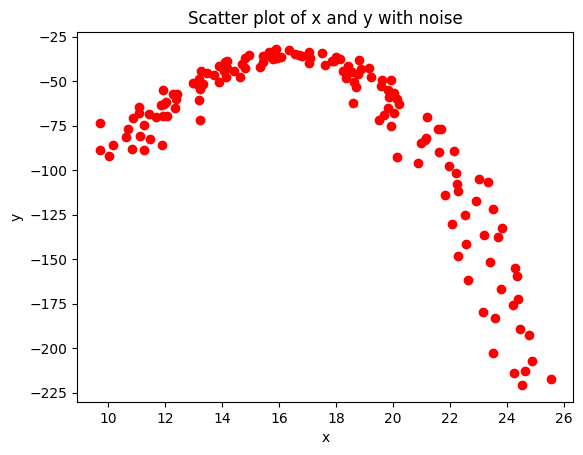

In [13]:
# Randomly remove 90 data points
# t_data = t_data.sample(frac=1).reset_index(drop=True)  # Shuffle the data
# t_data = t_data.iloc[90:]  # Remove the first 90 rows

# Add noise to the data
noise_x = np.random.normal(0, 0.60, t_data.shape[0])
noise_y = np.random.normal(0, 0.60, t_data.shape[0])
t_data['x_noisy'] = t_data['x'] + noise_x
t_data['y_noisy'] = t_data['y'] + noise_y

# Print the first few rows of the noisy data to check
print(t_data.head())

# Create a scatter plot with noisy data
plt.scatter(t_data['x_noisy'], t_data['y_noisy'], color='red')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with noise')

# Show the plot
plt.show()

fitting a linear model

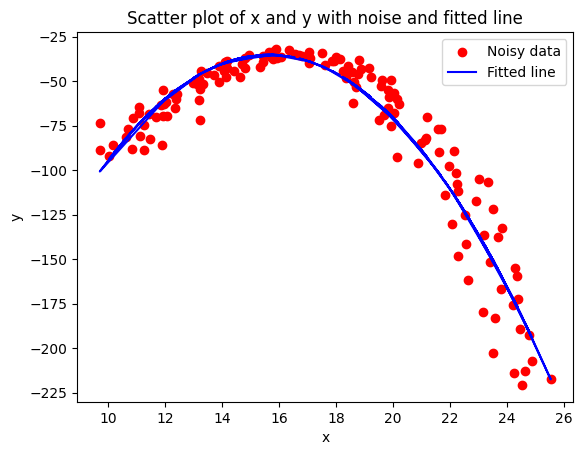

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Select 50 data points for training
train_data = t_data.sample(n=50)

# Fit a polynomial model to the training data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(train_data[['x_noisy']])
model = LinearRegression()
model.fit(X_poly, train_data['y_noisy'])

# Predict y values using the fitted model
X_poly_full = poly.transform(t_data[['x_noisy']])
t_data['y_pred'] = model.predict(X_poly_full)


# Create a scatter plot with noisy data
plt.scatter(t_data['x_noisy'], t_data['y_noisy'], label='Noisy data', color='red')

# Plot the fitted line
plt.plot(t_data['x_noisy'], t_data['y_pred'], color='blue', label='Fitted line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with noise and fitted line')
plt.legend()

# Show the plot
plt.show()

Estimate their generalized performance

In [15]:
from sklearn.metrics import mean_squared_error

# Split the 50 data points into a training set (30 points) and a test set (20 points)
train_set = train_data.sample(n=30)
test_set = train_data.drop(train_set.index)

# Predict y values for the test set using the already fitted model
X_poly_test = poly.transform(test_set[['x_noisy']])
y_pred_test = model.predict(X_poly_test)

# Calculate the MSE on the test set
mse = mean_squared_error(test_set['y_noisy'], y_pred_test)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 143.66467929018353


Fitting a linear model is a straightforward and interpretable approach, which is a good starting point for regression problems.

Using MSE to evaluate the model's performance is appropriate for regression tasks as it quantifies the average squared difference between the predicted and actual values.

A linear model might not capture the underlying relationship between the independent variable (x) and the dependent variable (y) if the relationship is non-linear. It might be worth considering fitting a polynomial regression model or other non-linear models if the data suggests a non-linear relationship.

Drawing 20 data points at random from the original 50 for the test set may not provide a reliable estimate of the model's generalization performance. Instead, consider using cross-validation to better assess the model's performance on unseen data.

Fit a polynomial regression model to capture potential non-linear relationships in the data.

By fitting a polynomial regression model and using cross-validation, we can better capture potential non-linear relationships in the data and obtain a more reliable estimate of the model's generalization performance. This approach addresses the weaknesses of the initial approach and provides a more robust solution to the regression problem.

## Sub-task 2

### Data Preparation
First, we will load the dataset and split it into training and testing sets.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('classification.csv')

# Features and target split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM Classifier
We will use GridSearchCV to find the best hyperparameters for the SVM classifier.

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [1, 0.1, 0.01, 0.001],
#     'kernel': ['rbf']
# }

# Initialize SVM
svm = SVC()

# Grid search
# grid_search_svm = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)
# grid_search_svm.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Best estimator
# best_svm = grid_search_svm.best_estimator_

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.82


In [39]:
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.76      0.83        29
         1.0       0.73      0.90      0.81        21

    accuracy                           0.82        50
   macro avg       0.82      0.83      0.82        50
weighted avg       0.84      0.82      0.82        50



In [40]:
print("SVM Confusion:\n", confusion_matrix(y_test, y_pred_svm))

SVM Confusion:
 [[22  7]
 [ 2 19]]


Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.6
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.70      0.55      0.62        29
         1.0       0.52      0.67      0.58        21

    accuracy                           0.60        50
   macro avg       0.61      0.61      0.60        50
weighted avg       0.62      0.60      0.60        50



In [42]:
print("Logistic Regression Confusion:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Confusion:
 [[16 13]
 [ 7 14]]


**K-Nearest Neighbors**

KNN is a simple, instance-based learning algorithm that classifies a sample based on the majority class among its k-nearest neighbors. It is effective for small datasets and can capture complex decision boundaries.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize KNN
knn = KNeighborsClassifier()

# Train KNN
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.84
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.76      0.85        29
         1.0       0.74      0.95      0.83        21

    accuracy                           0.84        50
   macro avg       0.85      0.86      0.84        50
weighted avg       0.87      0.84      0.84        50



In [44]:
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Confusion Matrix:
 [[22  7]
 [ 1 20]]


**Artificial Neural Network with Perceptron**

ANNs are powerful models capable of capturing complex patterns in data. The Perceptron is a simple type of ANN that can be used for binary classification problems. It is suitable for this problem due to its ability to learn non-linear decision boundaries.


In [45]:
from sklearn.neural_network import MLPClassifier

# Initialize ANN
ann = MLPClassifier(max_iter=1000)

# Train ANN
ann.fit(X_train, y_train)

# Predictions
y_pred_ann = ann.predict(X_test)

# Evaluation
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))



ANN Accuracy: 0.88
ANN Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89        29
         1.0       0.83      0.90      0.86        21

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



In [46]:
print("ANN Confusion\n", confusion_matrix(y_test, y_pred_ann))

ANN Confusion
 [[25  4]
 [ 2 19]]


**Naive Bayes**

Naive Bayes is a probabilistic classifier based on Bayes' theorem. It is simple, fast, and effective for high-dimensional data. It assumes independence between features, which may not always hold but can still perform well in practice.

In [47]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes
nb = GaussianNB()

# Train Naive Bayes
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.78
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.66      0.78        29
         1.0       0.67      0.95      0.78        21

    accuracy                           0.78        50
   macro avg       0.81      0.80      0.78        50
weighted avg       0.83      0.78      0.78        50



In [48]:
print("Naive Bayes Confusion matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Confusion matrix:
 [[19 10]
 [ 1 20]]


**Best Approach**

Based on the results, we can compare the performance of the classifiers. 
The model with the highest accuracy and best classification report on the test set is likely to generalize better to unseen data.

In [ ]:
# Store the results in a dictionary
results = {
    'KNN': accuracy_score(y_test, y_pred_knn),
    'ANN': accuracy_score(y_test, y_pred_ann),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg)
}

In [50]:
result_display = pd.Series(results)
print(result_display.sort_values(ascending=False))

ANN                    0.88
KNN                    0.84
SVM                    0.82
Naive Bayes            0.78
Logistic Regression    0.60
dtype: float64


<Axes: title={'center': 'Model Comparison'}, xlabel='Model', ylabel='Accuracy'>

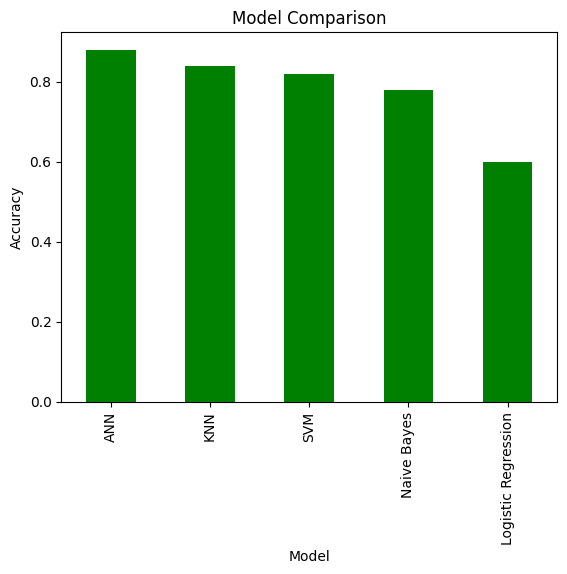

In [51]:
result_display.sort_values(ascending=False).plot(kind='bar', title='Model Comparison', xlabel='Model', ylabel='Accuracy', color='green')

In [53]:
# Find the Top K-models
top_k = 2
topk_models = result_display.nlargest(top_k)
topk_models

ANN    0.88
KNN    0.84
dtype: float64

To address this binary classification problem, we will design and test classifiers using two distinct algorithms: Perceptron and K-Nearest mean. They are the most simplest and could pick up minute details from the dataset.

- **ANN**
Perceptron is a simple feedforward ANN structure that predicts the data and by reducing the alpha error rate while training learns to optimize the solution to fit the data model more perfectly by itteratively correcting itself.

- **KNN**
KNN is a clustering algorithm that can be used for unsupervised classification of data. However, being unsupervised the result at each run can be different and so to get the correct result an optimal number of cluster has to be decided before hand for creation of the appropriate classes.

## Picking top performers and Tuning

## Data Processing

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# adding PCA no formatting
pca = PCA(n_components=20)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### ANN Hyper Para

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid for hyperparameter tuning
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize GridSearchCV with MLPClassifier
grid_search_ann = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_ann, cv=5, verbose=2, n_jobs=-1)

# Train ANN with GridSearchCV
grid_search_ann.fit(X_train, y_train)

# Best estimator
best_ann = grid_search_ann.best_estimator_

# Predictions
y_pred_ann = best_ann.predict(X_test)

# Evaluation
print("Best ANN Parameters:", grid_search_ann.best_params_)
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

In [56]:
print("ANN Confusion:\n", classification_report(y_test, y_pred_ann))

ANN Confusion:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        29
         1.0       0.79      0.90      0.84        21

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



### KNN Hyper-Para

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11], ## did not use elbow method as of now
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize GridSearchCV with KNeighborsClassifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=2, n_jobs=-1)

# Train KNN with GridSearchCV
grid_search_knn.fit(X_train, y_train)

# Best estimator
best_knn = grid_search_knn.best_estimator_

# Predictions
y_pred_knn = best_knn.predict(X_test)

# Evaluation
print("Best KNN Parameters:", grid_search_knn.best_params_)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
KNN Accuracy: 0.8
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.69      0.80        29
         1.0       0.69      0.95      0.80        21

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.80        50
weighted avg       0.84      0.80      0.80        50



In [58]:
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Confusion Matrix:
 [[20  9]
 [ 1 20]]


In [60]:
# Print the new results of ANN
print("New ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("New ANN Classification Report:\n", classification_report(y_test, y_pred_ann))
print("New ANN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))

# Print the new results of KNN
print("New KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("New KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("New KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

New ANN Accuracy: 0.86
New ANN Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.83      0.87        29
         1.0       0.79      0.90      0.84        21

    accuracy                           0.86        50
   macro avg       0.86      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50

New ANN Confusion Matrix:
 [[24  5]
 [ 2 19]]
New KNN Accuracy: 0.8
New KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.69      0.80        29
         1.0       0.69      0.95      0.80        21

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.80        50
weighted avg       0.84      0.80      0.80        50

New KNN Confusion Matrix:
 [[20  9]
 [ 1 20]]


The final answer is ANN as it has the maximum. One of the major affecting factor for this that the the standardization and Principal Components contibution to dimentionality reduction that correctly picks up the variance within the values for better accuracies in predictions.